# HR SALARY PREDICTION DASHBOARD

**Problem Statement**

The goal of this project is to clean the data, analysis and predict whether a person's salary is higher or lower than $50k/year based on their attributes using several ML classification techniques.

### Importing the collected data to python environment


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dataset into Python enviornment

In [4]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from collections import Counter
def printmd(string):
    display(Markdown(string))


# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
data=pd.read_csv('/content/drive/MyDrive/DSA/internship/salary.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [8]:
data.shape

(48842, 15)

In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  15
Number of rows in the dataset:  48842
Total number of datapoints in the dataset: 732630
Count of Numerical Features: 6
Count of Categorical Features: 9


In [11]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [12]:
unique_checker(data) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in age feature.
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

****************************************
Unique values in workclass feature.
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

****************************************
Unique values in fnlwgt feature.
[226802  89814 336951 ... 129912 255835 257302] 

****************************************
Unique values in education feature.
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

****************************************
Unique values in educational-num feature.
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

***********************************

In [13]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [14]:
count_checker(data) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in age feature.
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

****************************************
Count for each category of values in workclass feature.
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

****************************************
Count for each category of values in fnlwgt feature.
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64 

****************************************
Count for each category of values in education feature.
HS-grad         15784
Some-college    10878
Bachel

**Findings**

- The dataset contains 48,842 entries with a total of 15 columns representing different attributes of the people. Here’s the list;

1. Age: Discrete (from 17 to 90)
2. Work class (Private, Federal-Government, etc): Nominal (9 categories)
3. Final Weight (the number of people the census believes the entry represents): Discrete
4. Education (the highest level of education obtained): Ordinal (16 categories)
5. Education Number (the number of years of education): Discrete (from 1 to 16)
6. Marital Status: Nominal (7 categories)
7. Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
8. Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)
9. Race: Nominal (5 categories)
10. Sex: Nominal (2 categories)
11. Capital Gain: Continous
12. Capital Loss: Continous
13. Hours (worked) per week: Discrete (from 1 to 99)
14. Native Country: Nominal (42 countries)
15. Salary (whether or not an individual makes more than 50,000 dollar annually):     Boolean (≤50k, >50k)

In [15]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(data)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

### Renaming the columns

In [16]:

#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'native-country': 'country','hours-per-week': 'hours_per_week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'Salary'],
      dtype='object')

### Data Cleaning

### 1. Missing Values

In [17]:
 #check the missing value
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
country            0
Salary             0
dtype: int64

**Above sum shows there are no null values in the dataset.**

In [18]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
country             857
Salary                0
dtype: int64

**Findings**

- we see that there is a special character as " ?" for columns workcalss, Occupation, and country, we need to clean those data. 
- In this case, as the missing value fall into the categorical features, we will use the pandas DataFrame mode() method to fill the missing value.

In [19]:
#Handling missing values
# the code will replace the special character to nan  
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)



In [20]:

df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
country             857
Salary                0
dtype: int64

In [21]:
#we will use the pandas DataFrame mode() method to fill the missing value.
df = df.fillna(df.mode().iloc[0])

In [22]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
country            0
Salary             0
dtype: int64

### 2. Remove duplicate data 

In [23]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

53

In [24]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [25]:
df.shape

(48789, 15)

In [26]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'Salary'],
      dtype='object')

In [27]:
3.

3.0

### 3. Handling Outliers

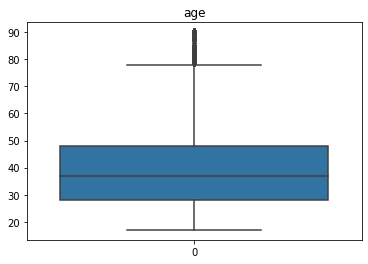

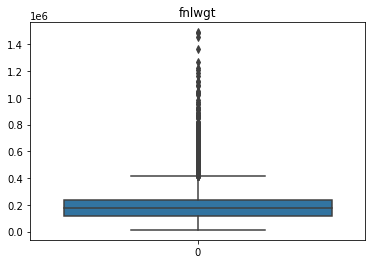

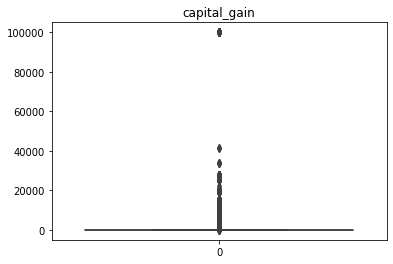

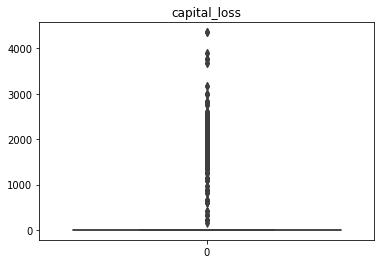

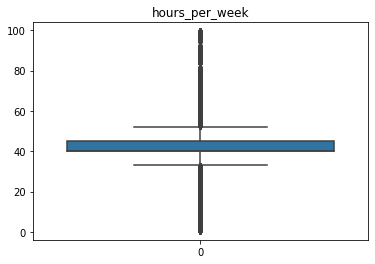

In [28]:
## checking outliers
for i in ['age', 'fnlwgt',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()  


In [29]:
df1=df
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Handling Outliers with age

In [30]:
q1 = np.percentile(df1['age'],25,interpolation='midpoint')
q3 = np.percentile(df1['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['age'][(df1['age']<low_limit)|(df1['age']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with fnlwgt

In [31]:
q1 = np.percentile(df1['fnlwgt'],25,interpolation='midpoint')
q3 = np.percentile(df1['fnlwgt'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['fnlwgt'][(df1['fnlwgt']<low_limit)|(df1['fnlwgt']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with capital_gain

In [32]:

q1 = np.percentile(df1['capital_gain'],25,interpolation='midpoint')
q3 = np.percentile(df1['capital_gain'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['capital_gain'][(df1['capital_gain']<low_limit)|(df1['capital_gain']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with capital_loss

In [34]:
q1 = np.percentile(df1['capital_loss'],25,interpolation='midpoint')
q3 = np.percentile(df1['capital_loss'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['capital_loss'][(df1['capital_loss']<low_limit)|(df1['capital_loss']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with hours_per_week

In [35]:
q1 = np.percentile(df1['hours_per_week'],25,interpolation='midpoint')
q3 = np.percentile(df1['hours_per_week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['hours_per_week'][(df1['hours_per_week']<low_limit)|(df1['hours_per_week']>high_limit)].index
df1.drop(index,inplace=True)

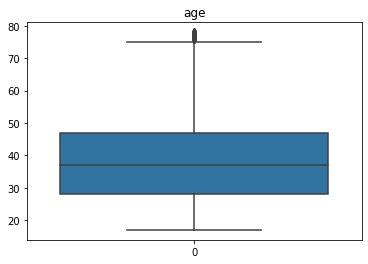

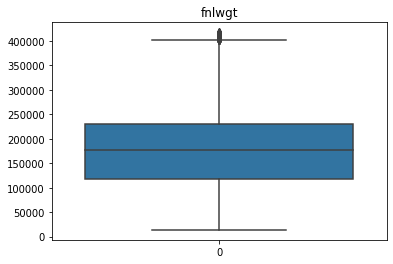

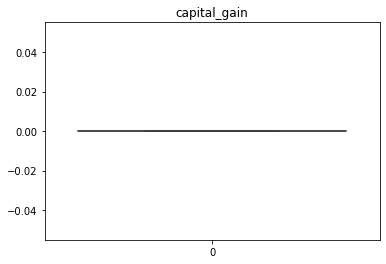

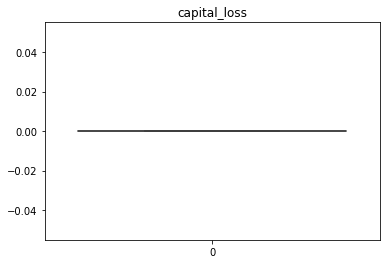

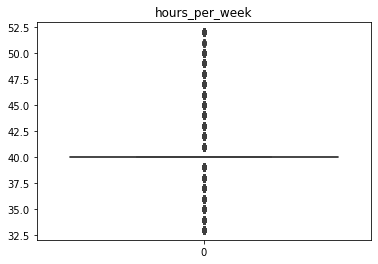

In [36]:
## checking outliers
for i in ['age', 'fnlwgt',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df1[i])
    plt.show() 

### 5. Exploratory Data analysis

#### Check descriptive statistics - Numerical columns

In [37]:
df1.describe()

,age,fnlwgt,educational-num,capital_gain,capital_loss,hours_per_week
count,29612.000000,29612.000000,29612.000000,29612.0,29612.0,29612.000000
mean,38.306430,181242.372180,9.990207,0.0,0.0,41.443469
std,12.221412,87329.732998,2.487775,0.0,0.0,3.946667
min,17.000000,13769.000000,1.000000,0.0,0.0,33.000000
25%,28.000000,117222.000000,9.000000,0.0,0.0,40.000000
50%,37.000000,177083.000000,10.000000,0.0,0.0,40.000000
75%,47.000000,230961.000000,12.000000,0.0,0.0,40.000000
max,78.000000,417668.000000,16.000000,0.0,0.0,52.000000


#### Check descriptive statistics - Categorical columns

In [38]:
df1.describe(exclude='number')

,workclass,education,marital,occupation,relationship,race,gender,country,Salary
count,29612,29612,29612,29612,29612,29612,29612,29612,29612
unique,8,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22780,10458,13443,4731,11946,25041,19941,26956,23553


#### Check 'education' & 'educational-num' columns

In [39]:
df1['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Bachelors',
       'Masters', 'Doctorate', '5th-6th', '10th', 'Assoc-voc', '7th-8th',
       '9th', 'Prof-school', '12th', '1st-4th', 'Preschool'], dtype=object)

In [40]:
df1['educational-num'].unique()

array([ 7,  9, 12, 10, 13, 14, 16,  3,  6, 11,  4,  5, 15,  8,  2,  1])

As we can see, 'education' & 'educational-num' both columns have similer values
- 'education' has string values
- 'educational-num' has numerical values
- all HS-grad from education represents 9 in education-num
- all Masters from education represents 14 in education-num and likewise.
- Both columns conveying same information
 - So, we can remove 'education-num' column

### 6. Feature Reduction 

- While analyzing the dataset, 
- As we can see in 'descriptive statistics - Numerical columns',
    - 'capital-gain'and 'capital-loss' both columns have 75% data as 0.00
            - So, we can drop 'capital-gain'& 'capital-loss' both columns. 
- The column,education-num is the numerical version of the column education, so we also drop it.

In [41]:
df1.drop(['capital_gain','capital_loss','educational-num'], axis = 1,inplace = True)
df1.head()

,age,workclass,fnlwgt,education,marital,occupation,relationship,race,gender,hours_per_week,country,Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
6,29,Private,227026,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,40,United-States,<=50K
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K


In [42]:
df1.shape

(29612, 12)

Now, we need to convert the categorical values to numeric for modeling. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [43]:
df1.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [44]:
df1['marital'].value_counts()

married        13864
not married    11217
divorced        4531
Name: marital, dtype: int64

Before we do further analysis, we will separate the data as numeric and categorical so that our analysis becomes easy.

In [45]:
# NUMERIC FEATURES:

numeric_data = df1.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns 

print('Numeric Features: ')
print(numeric_data.head(5))
print('----'*20)

Numeric Features: 
   age  fnlwgt  hours_per_week
0   25  226802              40
1   38   89814              50
2   28  336951              40
6   29  227026              40
8   24  369667              40
--------------------------------------------------------------------------------


In [46]:

# CATEGORICAL FEATURES:

categorical_data = df1.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

print('Categorical Features: ')
print(categorical_data.head(5))
print('----'*20)

Categorical Features: 
   workclass     education      marital         occupation relationship  \
0    Private          11th  not married  Machine-op-inspct    Own-child   
1    Private       HS-grad      married    Farming-fishing      Husband   
2  Local-gov    Assoc-acdm      married    Protective-serv      Husband   
6    Private       HS-grad  not married     Prof-specialty    Unmarried   
8    Private  Some-college  not married      Other-service    Unmarried   

    race  gender        country Salary  
0  Black    Male  United-States  <=50K  
1  White    Male  United-States  <=50K  
2  White    Male  United-States   >50K  
6  Black    Male  United-States  <=50K  
8  White  Female  United-States  <=50K  
--------------------------------------------------------------------------------


### 7. Data visualization

### Univariate Analysis

#### NUMERIC DATA:

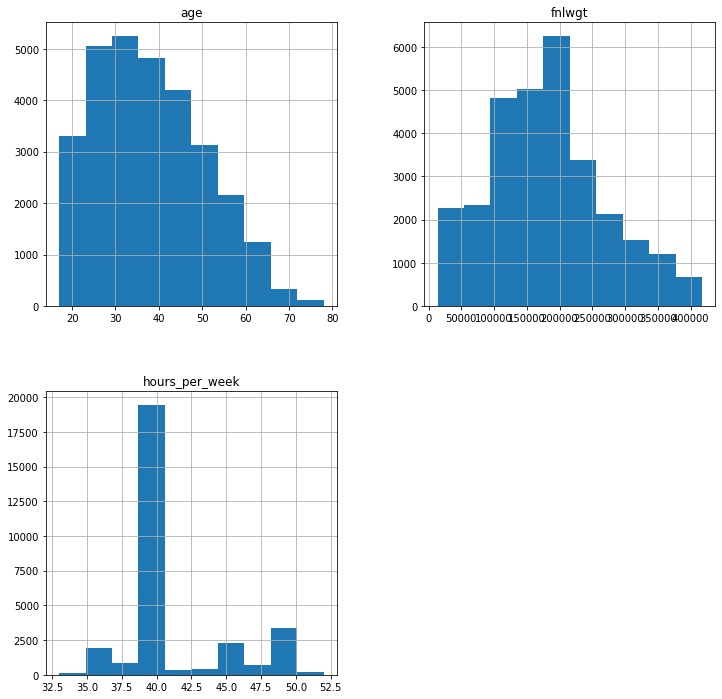

In [47]:




# let's see how data is distributed for every column
df1.hist(figsize=(12,12), sharex=False);

**Findings**
- The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40
- The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

### CATEGORICAL DATA:

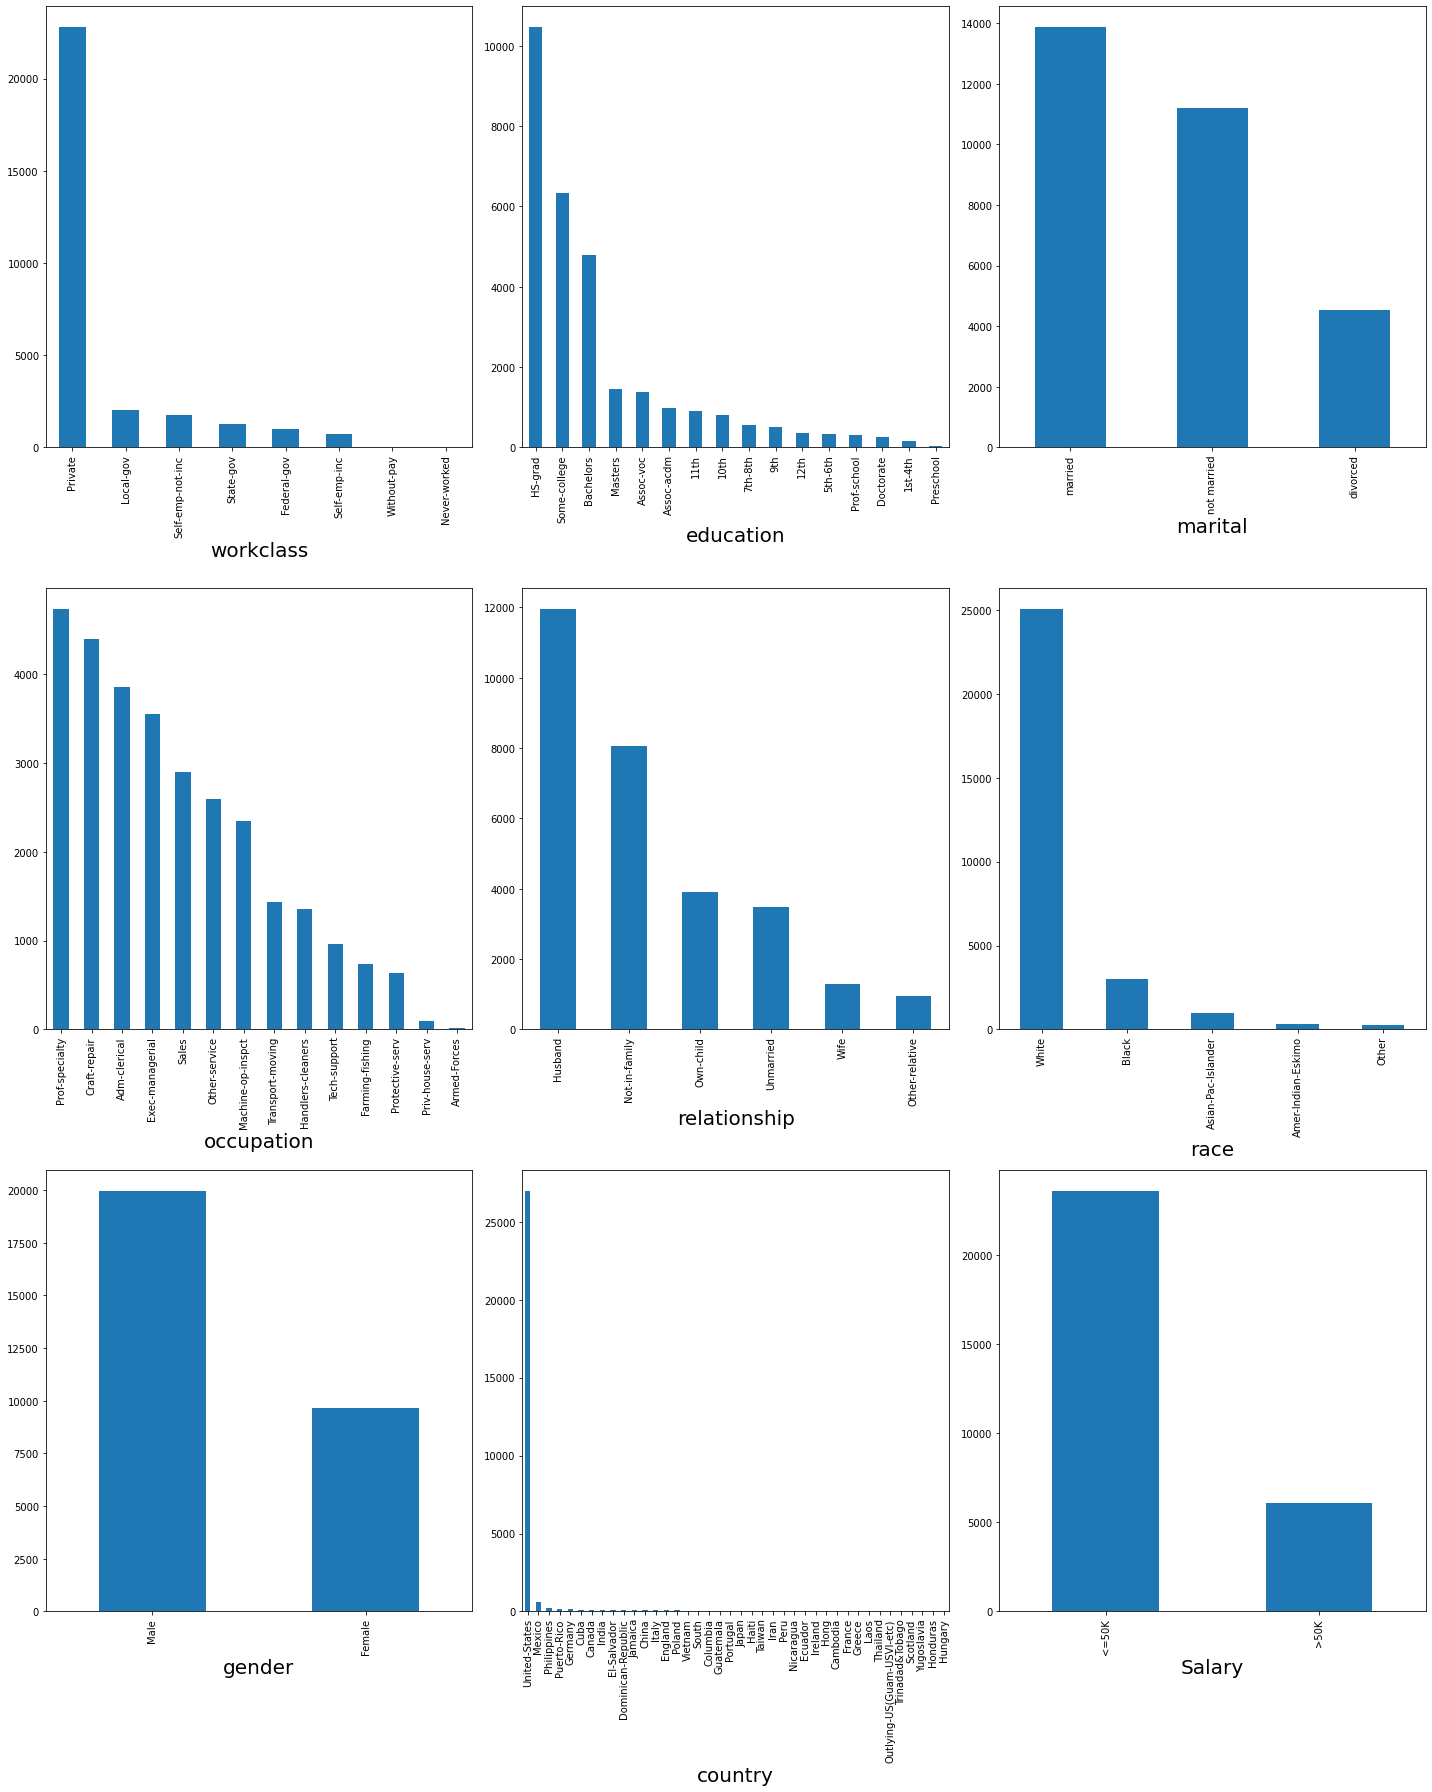

In [48]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        categorical_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Findings**
- if we look at the workclass variable variable we can see that 74% people are privately employed, 26% belong to other 7 categories.
- Looking at the education, majority of people have completed high graduation, have attended college or have atleast completed masters.
- Considering the marital status, 50% are married and 35% are never married.
- The occupation variable is equally distributed among various occupations.
- If we consider the race variable, 92% are white and 8% belong to 4 other races.
- 72% of the people in the data are male.
- 96% of the people belong to US, 4% elong to remaining countries.
- 25% people have salary above 50k and 75% below 50k, this indicated that we have imbalanced data.

### BI-VARIATE ANALYSIS:

Plot numeric variable againts the salary variable 

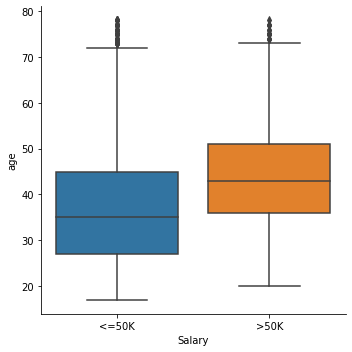

In [49]:
# Plotting income vs age
sns.catplot(x="Salary", y= "age", kind="box", data=df1)

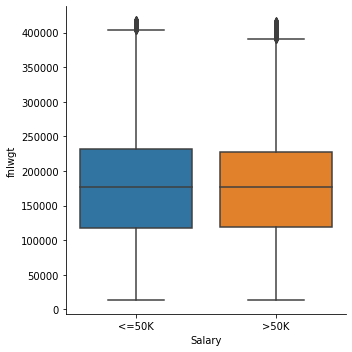

In [50]:

# Plotting Salary vs fnlwgt
sns.catplot(x="Salary", y= "fnlwgt", kind="box", data=df1)

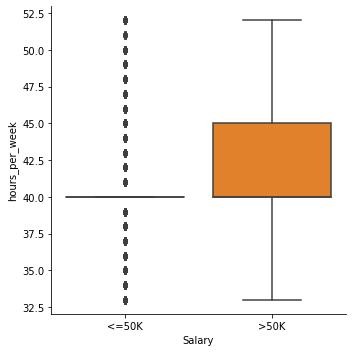

In [51]:
# Plotting Salary vs hours_per_week
sns.catplot(x="Salary", y= "hours_per_week", kind="box", data=df1)

**Findings**
- fnlwgt variable has no difference whether the income is above 50k or below 50k.
- age and hours-per-week variables have have some variation in distribution wrt whether the income is above 50k or below 50k.

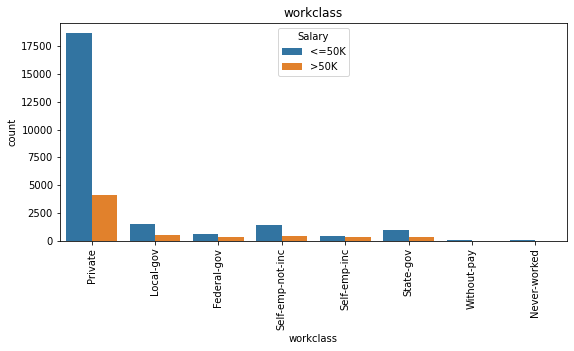

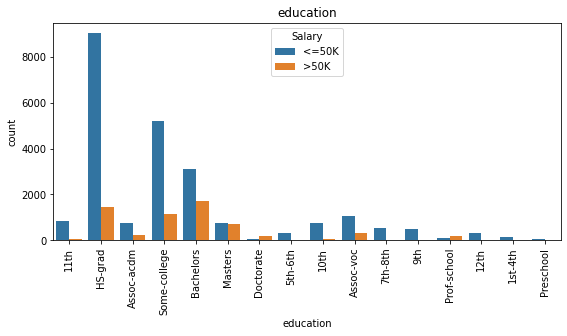

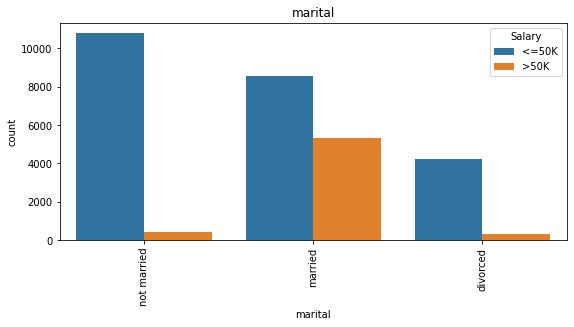

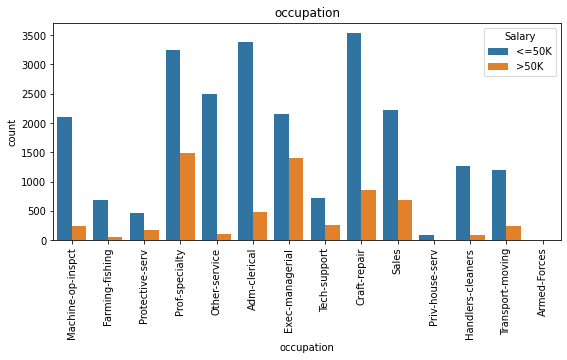

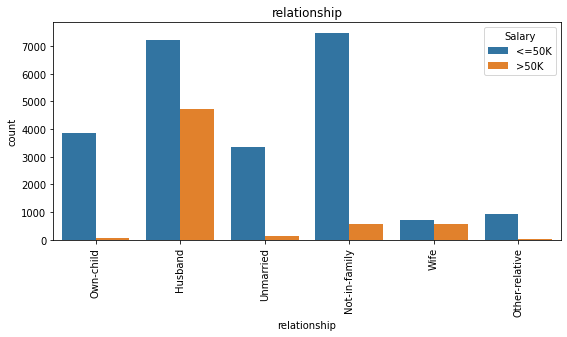

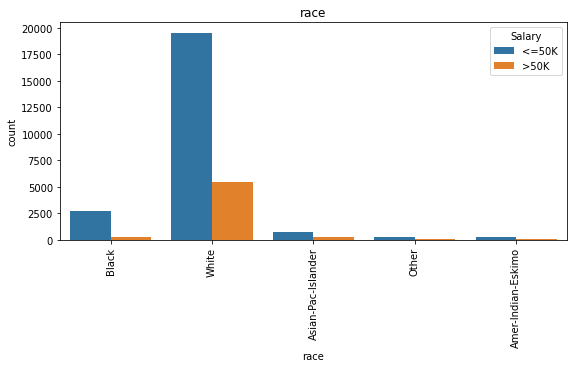

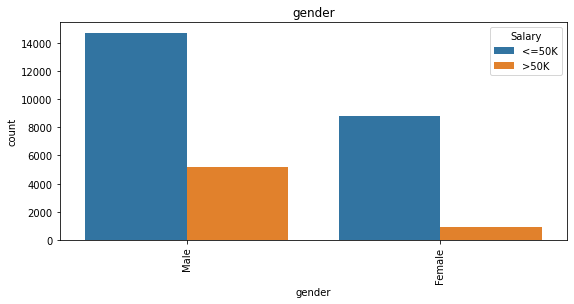

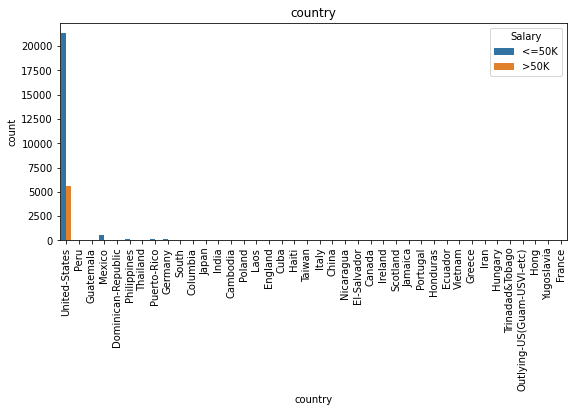

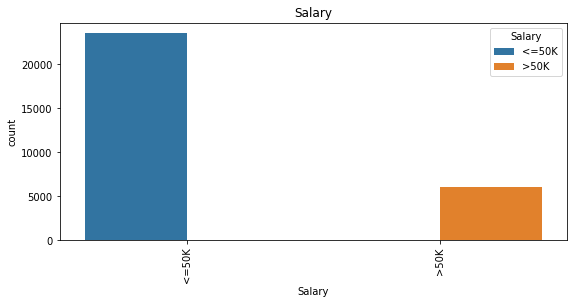

In [52]:

for column in categorical_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=categorical_data[column],hue=categorical_data['Salary'],data=categorical_data)
    plt.title(column)    
    plt.xticks(rotation=90)

**Findings**

People who are having income more than 50k are:

- From the workclass, who are privately employed, also self employed individuals.
- If you consider quality of info, then, masters and bachelors, also, High school and college grads.
- From marital status, people who are married.
- Individuals who's occupation are exec-managerial or having professional speciality.
- Individuals, who are husbands.
- White people.
- Male individuals.
- people living in the United states.

In [53]:
df1.corr()

,age,fnlwgt,hours_per_week
age,1.000000,-0.070365,0.050434
fnlwgt,-0.070365,1.000000,-0.018945
hours_per_week,0.050434,-0.018945,1.000000


## 8. Feature Engineering

In [54]:
# education Category
df1.education= df1.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df1.education = df1.education.replace('HS-grad', 'high school')
df1.education = df1.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df1.education = df1.education.replace('Bachelors', 'undergrad')
df1.education = df1.education.replace('Masters', 'grad')
df1.education = df1.education.replace('Doctorate', 'doc')

In [55]:
# Salary
df1.Salary = df1.Salary.replace('<=50K', 0)
df1.Salary = df1.Salary.replace('>50K', 1)

In [56]:
df1.corr()

,age,fnlwgt,hours_per_week,Salary
age,1.000000,-0.070365,0.050434,0.226044
fnlwgt,-0.070365,1.000000,-0.018945,-0.001791
hours_per_week,0.050434,-0.018945,1.000000,0.176685
Salary,0.226044,-0.001791,0.176685,1.000000


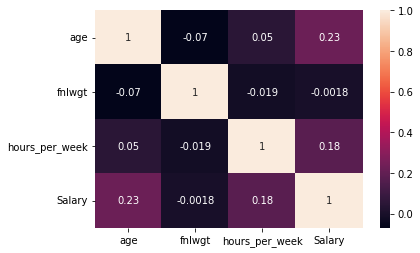

In [57]:
sns.heatmap(df1.corr(), annot=True);

In [58]:
# Salary
df1.Salary = df1.Salary.replace( 0,'<=50K')
df1.Salary = df1.Salary.replace( 1,'>50K')

In [59]:
df1['Salary'].value_counts()

<=50K    23553
>50K      6059
Name: Salary, dtype: int64

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29612 entries, 0 to 48839
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29612 non-null  int64 
 1   workclass       29612 non-null  object
 2   fnlwgt          29612 non-null  int64 
 3   education       29612 non-null  object
 4   marital         29612 non-null  object
 5   occupation      29612 non-null  object
 6   relationship    29612 non-null  object
 7   race            29612 non-null  object
 8   gender          29612 non-null  object
 9   hours_per_week  29612 non-null  int64 
 10  country         29612 non-null  object
 11  Salary          29612 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.9+ MB


In [61]:
#Covert workclass Columns Datatype To Category Datatype
df1['workclass'] = df1['workclass'].astype('category')

 I chose not to use the 'Fnlwgt' attribute that is used by the census, as the inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups. This attribute does not convey individual related meaning.

In [62]:
df1.drop(['fnlwgt'], axis = 1,inplace = True)

## 9. Encoding

In [63]:
df1.columns

Index(['age', 'workclass', 'education', 'marital', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'country',
       'Salary'],
      dtype='object')

In [64]:
unique_checker(df1)

Unique values in age feature.
[25 38 28 29 24 36 26 58 43 40 34 54 56 23 65 22 17 20 44 39 21 63 33 30
 47 41 46 50 45 31 59 49 18 48 42 57 32 19 27 51 52 53 77 55 35 61 64 37
 68 62 73 66 60 67 71 74 78 69 70 75 72 76] 

****************************************
Unique values in workclass feature.
['Private', 'Local-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'State-gov', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay'] 

****************************************
Unique values in education feature.
['school' 'high school' 'higher' 'undergrad' 'grad' 'doc'] 

****************************************
Unique values in marital feature.
['not married' 'married' 'divorced'] 

****************************************
Unique values in occupation feature.
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Othe

### One-Hot Encoding

In [65]:
#Select the variables to be one-hot encoded
one_hot_features = ['marital','gender']
df1 = pd.get_dummies(df1, columns=one_hot_features)

In [66]:
df1.head()

,age,workclass,education,occupation,relationship,race,hours_per_week,country,Salary,marital_divorced,marital_married,marital_not married,gender_Female,gender_Male
0,25,Private,school,Machine-op-inspct,Own-child,Black,40,United-States,<=50K,0,0,1,0,1
1,38,Private,high school,Farming-fishing,Husband,White,50,United-States,<=50K,0,1,0,0,1
2,28,Local-gov,higher,Protective-serv,Husband,White,40,United-States,>50K,0,1,0,0,1
6,29,Private,high school,Prof-specialty,Unmarried,Black,40,United-States,<=50K,0,0,1,0,1
8,24,Private,higher,Other-service,Unmarried,White,40,United-States,<=50K,0,0,1,1,0


### Label Encoding

In [67]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df1['workclass']  = le.fit_transform(df1['workclass'])
df1['education']  = le.fit_transform(df1['education'])
df1['occupation']  = le.fit_transform(df1['occupation'])
df1['relationship']  = le.fit_transform(df1['relationship'])
df1['race']  = le.fit_transform(df1['race'])
df1['country']  = le.fit_transform(df1['country'])


In [68]:
df1.head()

,age,workclass,education,occupation,relationship,race,hours_per_week,country,Salary,marital_divorced,marital_married,marital_not married,gender_Female,gender_Male
0,25,3,4,6,3,2,40,37,<=50K,0,0,1,0,1
1,38,3,2,4,0,4,50,37,<=50K,0,1,0,0,1
2,28,1,3,10,0,4,40,37,>50K,0,1,0,0,1
6,29,3,2,9,4,2,40,37,<=50K,0,0,1,0,1
8,24,3,3,7,4,4,40,37,<=50K,0,0,1,1,0


## 9. Model Development & Classification

In [69]:
#Moved the salary column to another variable
target_salary = df1.pop('Salary')
df1.head()

,age,workclass,education,occupation,relationship,race,hours_per_week,country,marital_divorced,marital_married,marital_not married,gender_Female,gender_Male
0,25,3,4,6,3,2,40,37,0,0,1,0,1
1,38,3,2,4,0,4,50,37,0,1,0,0,1
2,28,1,3,10,0,4,40,37,0,1,0,0,1
6,29,3,2,9,4,2,40,37,0,0,1,0,1
8,24,3,3,7,4,4,40,37,0,0,1,1,0


### Logistic Regression Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [71]:
#since this is a binary classification we will use logistic reg

#normalizing data
scaler = StandardScaler()
df2 = scaler.fit_transform(df1.values)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(df2, target_salary,test_size=0.2, random_state=42)

clf = LogisticRegression().fit(x_train,y_train)
clf

LogisticRegression()

In [73]:
clf.score(x_test,y_test)

0.8028026338004389

In [75]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      4743
        >50K       0.51      0.19      0.28      1180

    accuracy                           0.80      5923
   macro avg       0.67      0.57      0.58      5923
weighted avg       0.76      0.80      0.77      5923



In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,clf.predict(x_test)),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,clf.predict(x_test),average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,clf.predict(x_test),average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,clf.predict(x_test),average='macro'),4))

Accuracy for Logistic Regression is 0.8028
Precision for Logistic Regression is 0.6699
Recall for Logistic Regression is 0.5745
F1-Score for Logistic Regression is 0.5841


In [75]:
y_pred1 = clf.predict(x_test)

Text(33.0, 0.5, 'Actual Labels')

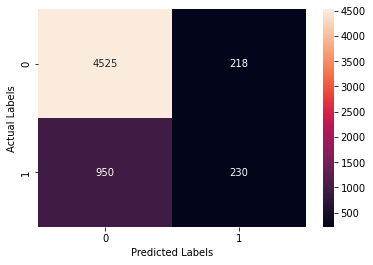

In [76]:



from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

### Support Vector Classifier

In [77]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy on training data is:',svc.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.7940394275824222
Accuracy is: 0.8007766334627723
Precision is: 0.6412432166999712
Recall is: 0.8007766334627723
f1 score is: 0.7121851814202005


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4743
        >50K       0.00      0.00      0.00      1180

    accuracy                           0.80      5923
   macro avg       0.40      0.50      0.44      5923
weighted avg       0.64      0.80      0.71      5923

[[4743    0]
 [1180    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on training data is:',dt_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9549157836970746
Accuracy is: 0.7935167989194665
Precision is: 0.7892880228881718
Recall is: 0.7935167989194665
f1 score is: 0.7912953628231054
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      4743
        >50K       0.48      0.45      0.47      1180

    accuracy                           0.79      5923
   macro avg       0.67      0.67      0.67      5923
weighted avg       0.79      0.79      0.79      5923

[[4164  579]
 [ 644  536]]


### KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

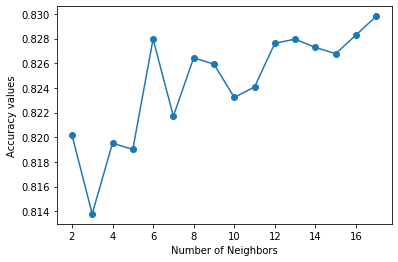

In [80]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [81]:
knn_model=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.8632276584068556
Accuracy is: 0.8217119702853284
Precision is: 0.8114455291676953
Recall is: 0.8217119702853284
f1 score is: 0.8154425375400783
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4743
        >50K       0.56      0.47      0.51      1180

    accuracy                           0.82      5923
   macro avg       0.72      0.69      0.70      5923
weighted avg       0.81      0.82      0.82      5923

[[4313  430]
 [ 626  554]]


### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9548313563257208
Accuracy is: 0.8210366368394395
Precision is: 0.8126796067624947
Recall is: 0.8210366368394395
f1 score is: 0.8161508311375681
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4743
        >50K       0.56      0.48      0.52      1180

    accuracy                           0.82      5923
   macro avg       0.72      0.69      0.70      5923
weighted avg       0.81      0.82      0.82      5923

[[4291  452]
 [ 608  572]]


# Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9548313563257208
Accuracy is: 0.8450109741684957
Precision is: 0.8324097124224497
Recall is: 0.8450109741684957
f1 score is: 0.8347231367088387
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4743
        >50K       0.66      0.47      0.55      1180

    accuracy                           0.85      5923
   macro avg       0.77      0.70      0.73      5923
weighted avg       0.83      0.85      0.83      5923

[[4453  290]
 [ 628  552]]


### Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9548313563257208
Accuracy is: 0.7145027857504643
Precision is: 0.8212914025004998
Recall is: 0.7145027857504643
f1 score is: 0.7417986693832939
              precision    recall  f1-score   support

       <=50K       0.93      0.70      0.80      4743
        >50K       0.39      0.78      0.52      1180

    accuracy                           0.71      5923
   macro avg       0.66      0.74      0.66      5923
weighted avg       0.82      0.71      0.74      5923

[[3308 1435]
 [ 256  924]]


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8429849738308289

**As seen in the  graph, there is a class imbalance problem. Models do not fit well when there is a class imbalance. There are some methods like oversampling, undersampling and mixture. I will do class oversampling using SMOTE(Synthetic Minority Oversampling Technique). It creates new samples along the lines of the existing samples.**

##Sampling

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
oversample=SMOTE()
x,y=oversample.fit_resample(df1,target_salary)
counter=Counter(y)
print(counter)

Counter({'<=50K': 23553, '>50K': 23553})


<BarContainer object of 2 artists>

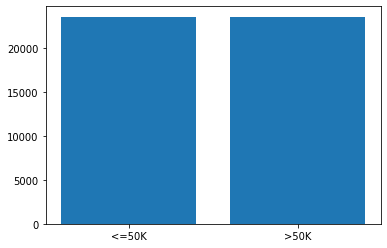

In [88]:
plt.bar(counter.keys(),counter.values())

In [89]:
#Standardisation
scale=StandardScaler()
X=scale.fit_transform(x)

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24) # 80% training and 20% test




##Logistic Regression

In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
logmodel.score(X_test,Y_test)


0.7961154744215665

##SVM

In [92]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7977125570533914
Accuracy is: 0.7898535342814689
Precision is: 0.8242280062204581
Recall is: 0.7898535342814689
f1 score is: 0.7843029723827173
              precision    recall  f1-score   support

       <=50K       0.93      0.63      0.75      4729
        >50K       0.72      0.95      0.82      4693

    accuracy                           0.79      9422
   macro avg       0.82      0.79      0.78      9422
weighted avg       0.82      0.79      0.78      9422

[[2974 1755]
 [ 225 4468]]


### Decision Tree Classifier

In [93]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7977125570533914
Accuracy is: 0.8462109955423477
Precision is: 0.8475360403179768
Recall is: 0.8462109955423477
f1 score is: 0.8460861126287426
              precision    recall  f1-score   support

       <=50K       0.87      0.82      0.84      4729
        >50K       0.83      0.88      0.85      4693

    accuracy                           0.85      9422
   macro avg       0.85      0.85      0.85      9422
weighted avg       0.85      0.85      0.85      9422

[[3861  868]
 [ 581 4112]]


##KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,Y_train)
  Y_pred=knn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

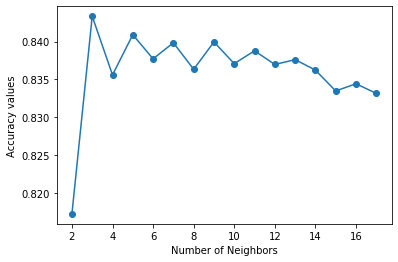

In [95]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [96]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9015231928669992
Accuracy is: 0.8433453619189132
Precision is: 0.8457384147875769
Recall is: 0.8433453619189132
f1 score is: 0.8431040170750499
              precision    recall  f1-score   support

       <=50K       0.87      0.80      0.84      4729
        >50K       0.82      0.88      0.85      4693

    accuracy                           0.84      9422
   macro avg       0.85      0.84      0.84      9422
weighted avg       0.85      0.84      0.84      9422

[[3797  932]
 [ 544 4149]]


##RANDOM FOREST

In [97]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9510667657361215
Accuracy is: 0.8646784122267035
Precision is: 0.8670187725446571
Recall is: 0.8646784122267035
f1 score is: 0.8644865561461845
              precision    recall  f1-score   support

       <=50K       0.90      0.83      0.86      4729
        >50K       0.84      0.90      0.87      4693

    accuracy                           0.86      9422
   macro avg       0.87      0.86      0.86      9422
weighted avg       0.87      0.86      0.86      9422

[[3905  824]
 [ 451 4242]]


##GRADIENT BOOSTING

In [98]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9510667657361215
Accuracy is: 0.8319889620038209
Precision is: 0.8371559420323927
Recall is: 0.8319889620038209
f1 score is: 0.8313919612915871
              precision    recall  f1-score   support

       <=50K       0.88      0.77      0.82      4729
        >50K       0.79      0.89      0.84      4693

    accuracy                           0.83      9422
   macro avg       0.84      0.83      0.83      9422
weighted avg       0.84      0.83      0.83      9422

[[3648 1081]
 [ 502 4191]]


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8299724050095522

##Model prediction Accuracy table

In [101]:
from tabulate import tabulate

In [102]:
table = [['Model', 'Accuracy'], ['Logistic Regression',79.61], ['KNN',84.62],['Decision tree',84.22],['Random Forest',86.46],['Gradient Boost',83.198],['SVM',79.8]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │     79.61  │
├─────────────────────┼────────────┤
│ KNN                 │     84.62  │
├─────────────────────┼────────────┤
│ Decision tree       │     84.22  │
├─────────────────────┼────────────┤
│ Random Forest       │     86.46  │
├─────────────────────┼────────────┤
│ Gradient Boost      │     83.198 │
├─────────────────────┼────────────┤
│ SVM                 │     79.8   │
╘═════════════════════╧════════════╛


##HyperParameter Tuning

###Logistic Regression

In [103]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid

param_grid = {'C': [1,10,100,1000]}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, Y_train)
logreg_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.8001804966693682


###SVM

In [103]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid

param_grid = {'C': [1,10,100,1000]}
  
# Instantiating logistic regression classifier
svm_clf = SVC()
  
# Instantiating the GridSearchCV object
svm_cv = GridSearchCV(svm_clf, param_grid, cv = 5)
  
svm_cv.fit(X_train, Y_train)
svm_cv.predict(X_test)

# Print the tuned parameters and score
#print("Tuned SVM Parameters: {}".format(logreg_cv.best_params_)) 
#print("Best score is {}".format(logreg_cv.best_score_))

Tuned SVM Parameters: {'C': 1}
Best score is 0.801480706504669


In [ ]:
#Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(svm_cv.best_params_)) 
print("Best score is {}".format(svm_cv.best_score_))

Hyperparameter tuning using GridSearchCV with more parameters

In [ ]:
# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_svm.fit(X_train, Y_train)

In [ ]:
grid_predicts = grid_svm.predict(X_test)

# print classification report
print(classification_report(Y_test, grid_predicts))

##GRADIENT Decent

In [107]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,Y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 1750}, 0.8541289792719681)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.15, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test)
ac_gb=accuracy_score(Y_test,y_pred)

In [109]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85      4729
        >50K       0.83      0.90      0.86      4693

    accuracy                           0.86      9422
   macro avg       0.86      0.86      0.86      9422
weighted avg       0.86      0.86      0.86      9422



###FineTuning of the Model Random Forest

9.1 Feature Importance

In [104]:
pd.Series(rf_model.feature_importances_,index=x.columns).sort_values(ascending=False)*100

age                    23.230004
relationship           17.499502
occupation             10.226261
marital_married         9.124338
marital_not married     8.612506
education               7.917253
hours_per_week          6.082120
workclass               4.330050
marital_divorced        4.306608
gender_Female           2.460164
country                 2.314634
race                    2.045493
gender_Male             1.851067
dtype: float64

9.2 Fine tuning of Hyperparameters

9.2.1 Grid Search CV

In [105]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_depth' : [20,25,30],
    'criterion' :['gini', 'entropy']
}

In [106]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 300}

In [111]:
rft = RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion='entropy')
rft.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300,
                       random_state=42)

In [114]:
y_pred=rft.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8651029505412864

In [113]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.81      0.86      4729
        >50K       0.83      0.92      0.87      4693

    accuracy                           0.87      9422
   macro avg       0.87      0.87      0.86      9422
weighted avg       0.87      0.87      0.86      9422



##Model prediction Accuracy table after tuning

In [110]:
from tabulate import tabulate



In [115]:
table = [['Model', 'Accuracy'], ['Logistic Regression',80.1],['Random Forest',86.510],['Gradient Boost',86],['SVM',79.8]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      80.1  │
├─────────────────────┼────────────┤
│ Random Forest       │      86.51 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      86    │
├─────────────────────┼────────────┤
│ SVM                 │      79.8  │
╘═════════════════════╧════════════╛


**It can be inferred from the table summary that Random Forest model gives best accuracy of 86.51 % while model training.**

**So that we finalized our ML model for predicting the salary using Random Forest Algorithm.**